In [1]:
import pyslim, tskit
import numpy as np
import msprime
from IPython.display import SVG #for displaying trees in svg format
import matplotlib
import matplotlib.pyplot as plt #plotting
import matplotlib.cm as cm

In [2]:
ts = pyslim.load("output_ts.trees")

In [3]:
ts

In [6]:
SVG(ts.simplify(keep_unary=False).draw_svg())

In [28]:
np.random.seed(314159); n = 5; sampled_nodes = np.random.choice(ts.samples(), 5, replace=False) #take sample of n nodes without replacement (set seed for repeatability)
sts = ts.simplify(sampled_nodes, keep_unary=True) #simplify but keep unary nodes & individuals
# SVG(sts.draw_svg()) #draw if you wish (but kind of ugly with all the unary nodes)
sts #print some summaries of the simplified tree sequence

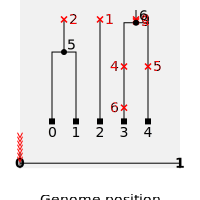

In [35]:
SVG(sts.simplify(keep_unary=False).draw_svg())

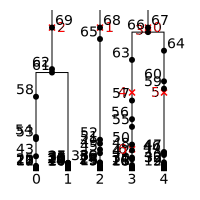

In [33]:
tree0 = sts.at_index(0)
SVG(tree0.draw_svg())

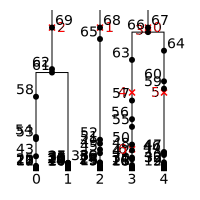

In [23]:
for t in np.unique(ts.individual_times):
    print(f"There are {np.sum(ts.individual_times == t)} individuals from time {t}.")

There are 5000 individuals from time 0.0.
There are 2293 individuals from time 1.0.
There are 1246 individuals from time 2.0.
There are 775 individuals from time 3.0.
There are 559 individuals from time 4.0.
There are 386 individuals from time 5.0.
There are 310 individuals from time 6.0.
There are 228 individuals from time 7.0.
There are 186 individuals from time 8.0.
There are 170 individuals from time 9.0.
There are 134 individuals from time 10.0.
There are 105 individuals from time 11.0.
There are 91 individuals from time 12.0.
There are 88 individuals from time 13.0.
There are 58 individuals from time 14.0.
There are 68 individuals from time 15.0.
There are 60 individuals from time 16.0.
There are 54 individuals from time 17.0.
There are 45 individuals from time 18.0.
There are 38 individuals from time 19.0.
There are 44 individuals from time 20.0.
There are 32 individuals from time 21.0.
There are 36 individuals from time 22.0.
There are 26 individuals from time 23.0.
There are 3

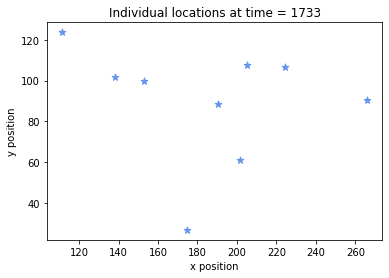

In [24]:
figure1 = plt.figure()
time = 1733 #choose the desired time step (we will use time = 0, or 0 time steps ago)
alive = ts.individuals_alive_at(time) #all individuals alive at time (defined above)
locs = ts.individual_locations[alive] #the locations of individuals from alive 

#Next, set up the x-y coordinates for our chosen individuals:
x=locs[:, 0] #x-axis values of plot using locs
y=locs[:, 1] #y-axis values of plot using locs

#Generate the scatter plot:
plt.scatter(x, y, color= "cornflowerblue", marker= "*", s=50)
#this function generates a scatter plot, and we can add some customizations:
#customize color with "color = __" or c = "xkcd:____"; e.g. c="xkcd:cornflower blue" or color="cornflowerblue"
#customize shape of points with "marker = <shape of points>" (* = stars!)
#customize size of points with "s = <size of point>"

#Finally, add some labels (plot axes and title):
plt.xlabel('x position') 
plt.ylabel('y position') 
plt.title('Individual locations at time = %d' %time) #Title uses the specific time chosen

plt.show() #display our plot
